<a href="https://colab.research.google.com/github/VaidehiMagare/API-INTEGRATION-AND-DATA-VISUALIZATION/blob/main/API_Integration_and_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
api_key = "c40f9ee221a109476ee1457ee2d56dc7"   # Open weather app api key
cities = ['Pune', 'Bombay', 'Madras', 'Delhi', 'Chandigarh', 'Patna']

# Empty lists to store data
temperature = []
humidity = []
weather_descr = []

successful_cities = []   # Track only those that succeeded

In [3]:
# Always reset the lists before starting
temperature.clear()
humidity.clear()
weather_descr.clear()
successful_cities.clear()

for city in cities:
  base_url="http://api.openweathermap.org/data/2.5/weather?"
  url = base_url + "appid=" + api_key + "&q=" + city + "&units=metric"
  response = requests.get(url)

  x = response.json()

  if response.status_code == 200:
    temp = x["main"]["temp"]
    humid = x["main"]["humidity"]
    description = x["weather"][0]["description"]

    temperature.append(temp)
    humidity.append(humid)
    weather_descr.append(description)
    successful_cities.append(city)   # only include city if successful

  else:
    print(f"Failed to get data for {city}")
    temperature.append(None)
    humidity.append(None)
    weather_descr.append("N/A")

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


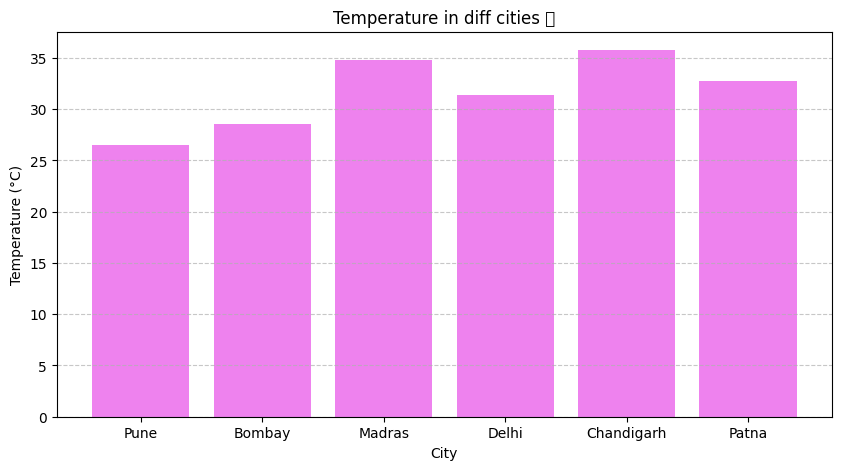

In [4]:
plt.figure(figsize=(10,5))
plt.bar(cities, temperature, color = 'violet')
plt.title("Temperature in diff cities 🌡️")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
print(len(successful_cities), len(humidity), len(weather_descr))

6 6 6


In [6]:
import pandas as pd

weather_data = pd.DataFrame({
    "City" : cities,
    "Humidity" : humidity,
    "Description" : weather_descr
})

/tmp/ipython-input-7-166119991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Humidity', data = weather_data, palette = "Blues_d")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


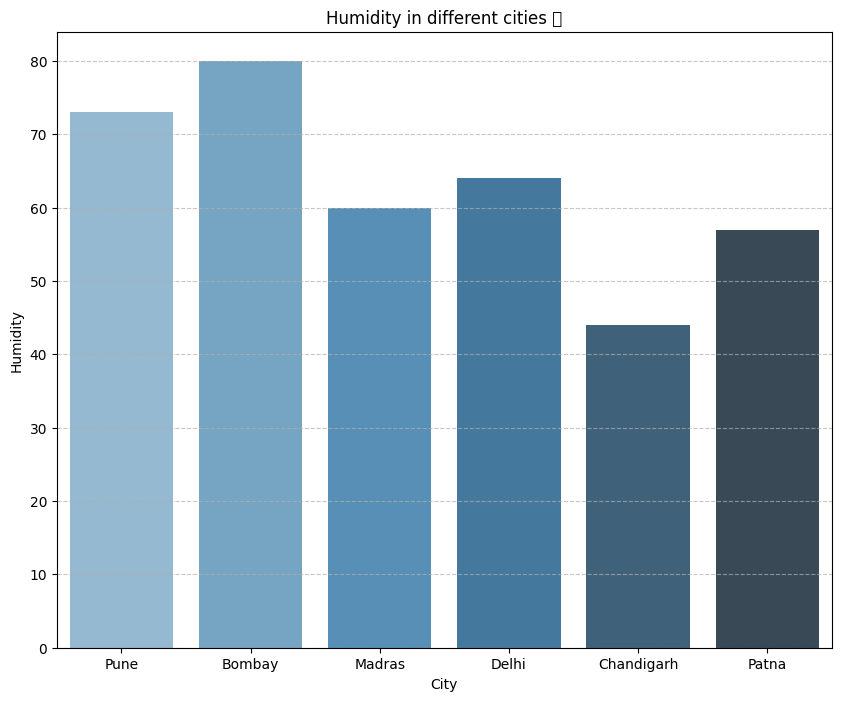

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(x='City', y='Humidity', data = weather_data, palette = "Blues_d")
plt.title("Humidity in different cities 💧")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
for i in range(len(cities)):
    print(f"{cities[i]}: {weather_descr[i]}")

Pune: overcast clouds
Bombay: overcast clouds
Madras: overcast clouds
Delhi: overcast clouds
Chandigarh: clear sky
Patna: overcast clouds
